In [127]:
from sklearn import datasets
import pandas as pd
dados = pd.read_csv('./penguins_lter.csv')
print(dados)

    studyName  Sample Number                              Species  Region  \
0     PAL0708              1  Adelie Penguin (Pygoscelis adeliae)  Anvers   
1     PAL0708              2  Adelie Penguin (Pygoscelis adeliae)  Anvers   
2     PAL0708              3  Adelie Penguin (Pygoscelis adeliae)  Anvers   
3     PAL0708              4  Adelie Penguin (Pygoscelis adeliae)  Anvers   
4     PAL0708              5  Adelie Penguin (Pygoscelis adeliae)  Anvers   
..        ...            ...                                  ...     ...   
339   PAL0910            120    Gentoo penguin (Pygoscelis papua)  Anvers   
340   PAL0910            121    Gentoo penguin (Pygoscelis papua)  Anvers   
341   PAL0910            122    Gentoo penguin (Pygoscelis papua)  Anvers   
342   PAL0910            123    Gentoo penguin (Pygoscelis papua)  Anvers   
343   PAL0910            124    Gentoo penguin (Pygoscelis papua)  Anvers   

        Island               Stage Individual ID Clutch Completion  Date Eg

In [128]:
print(dados.columns)

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')


In [129]:
X = dados[['Culmen Length (mm)', 'Culmen Depth (mm)']]
y = dados['Species']
print(X)

     Culmen Length (mm)  Culmen Depth (mm)
0                  39.1               18.7
1                  39.5               17.4
2                  40.3               18.0
3                   NaN                NaN
4                  36.7               19.3
..                  ...                ...
339                 NaN                NaN
340                46.8               14.3
341                50.4               15.7
342                45.2               14.8
343                49.9               16.1

[344 rows x 2 columns]


In [130]:
import pandas as pd
total = pd.DataFrame(data=X.values, columns=X.columns)
total.head()

,Culmen Length (mm),Culmen Depth (mm)
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0
3,NaN,NaN
4,36.7,19.3


In [131]:
# O dataset tem valores nulos, então precisa substituir os valores nulos pela média dos valores da coluna
from sklearn.impute import SimpleImputer
import numpy as np

imputer = SimpleImputer(strategy='mean')
imputer_data = imputer.fit(total.to_numpy())
total = imputer_data.transform(total.to_numpy())
X = pd.DataFrame(data=total, columns=X.columns)
print(X)

     Culmen Length (mm)  Culmen Depth (mm)
0              39.10000           18.70000
1              39.50000           17.40000
2              40.30000           18.00000
3              43.92193           17.15117
4              36.70000           19.30000
..                  ...                ...
339            43.92193           17.15117
340            46.80000           14.30000
341            50.40000           15.70000
342            45.20000           14.80000
343            49.90000           16.10000

[344 rows x 2 columns]


In [132]:
from sklearn.preprocessing import normalize
Xnorm = normalize(X)
print(Xnorm)

[[0.90213422 0.4314555 ]
 [0.91514414 0.40312679]
 [0.91306257 0.40781951]
 [0.93149928 0.36374317]
 [0.88507511 0.46544822]
 [0.88569917 0.46425961]
 [0.90932289 0.41609119]
 [0.89442719 0.4472136 ]
 [0.88328335 0.46883955]
 [0.90118796 0.4334285 ]
 [0.91110792 0.41216787]
 [0.90929247 0.41615767]
 [0.91926068 0.39364934]
 [0.87650341 0.48139565]
 [0.85376942 0.5206513 ]
 [0.89928733 0.43735832]
 [0.89765093 0.44070717]
 [0.89903258 0.43788175]
 [0.88178464 0.47165225]
 [0.90593141 0.42342446]
 [0.90006889 0.43574764]
 [0.8958484  0.44435982]
 [0.8818084  0.47160783]
 [0.90368966 0.42818803]
 [0.91419978 0.40526382]
 [0.88159133 0.47201349]
 [0.90913549 0.4165005 ]
 [0.91464777 0.40425173]
 [0.89771871 0.44056908]
 [0.90618314 0.42288547]
 [0.92106377 0.38941177]
 [0.89920939 0.43751855]
 [0.91170544 0.41084448]
 [0.90776441 0.41948037]
 [0.90605592 0.42315798]
 [0.88054322 0.47396586]
 [0.88886148 0.45817602]
 [0.91585822 0.40150183]
 [0.88964496 0.45665287]
 [0.9015584  0.43265742]


In [133]:
from sklearn.cluster import KMeans 
modelo = KMeans(n_clusters=2, init='random')
modelo.fit(Xnorm)

/home/bentocarlos/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=2)

In [134]:
print(modelo.cluster_centers_)

[[0.9478037  0.31753183]
 [0.90439463 0.42561772]]


In [135]:
distancia = modelo.fit_transform(Xnorm)
print(distancia)

[[0.12273672 0.00626012]
 [0.0916141  0.02492778]
 [0.09674095 0.0197967 ]
 [0.04900329 0.06755088]
 [0.16066777 0.04426864]
 [0.15932989 0.04292687]
 [0.10580511 0.01072578]
 [0.14023698 0.02378511]
 [0.16448982 0.04810211]
 [0.12492023 0.0084434 ]
 [0.10150153 0.01503219]
 [0.10587809 0.01065277]
 [0.08129317 0.03525587]
 [0.1787039  0.06236263]
 [0.22383021 0.10767679]
 [0.12927577 0.01280337]
 [0.13299423 0.01652783]
 [0.12985656 0.01338499]
 [0.1676652  0.05128732]
 [0.11387071 0.00267807]
 [0.12748956 0.01101486]
 [0.13705725 0.02059865]
 [0.16761502 0.05123698]
 [0.11912533 0.00266524]
 [0.09394746 0.02259253]
 [0.16807338 0.05169679]
 [0.10625454 0.01027616]
 [0.09284211 0.02369878]
 [0.13284077 0.01637409]
 [0.11327691 0.00326558]
 [0.07669257 0.03985889]
 [0.12945354 0.01298139]
 [0.10005166 0.01648322]
 [0.10952922 0.0070016 ]
 [0.11357712 0.00296819]
 [0.17028088 0.05391134]
 [0.15249581 0.03607384]
 [0.08984138 0.02670188]
 [0.15078827 0.0343618 ]
 [0.12406663 0.00758957]


/home/bentocarlos/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [136]:
rotulos = modelo.labels_
print(rotulos)

[1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


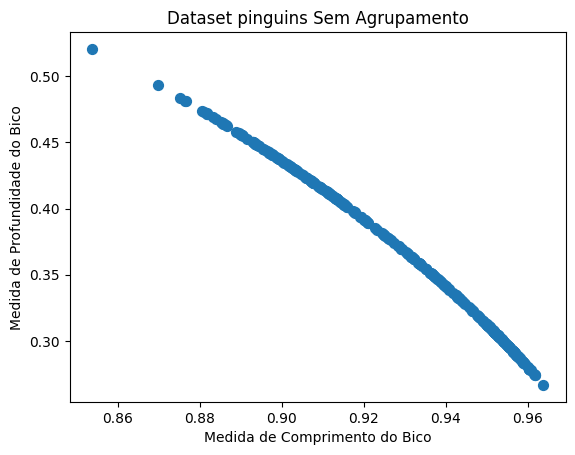

In [137]:
import matplotlib.pyplot as plt
plt.scatter(Xnorm[:,0], Xnorm[:,1], s=50)
plt.title('Dataset pinguins Sem Agrupamento')
plt.xlabel('Medida de Comprimento do Bico')
plt.ylabel('Medida de Profundidade do Bico')
plt.show()

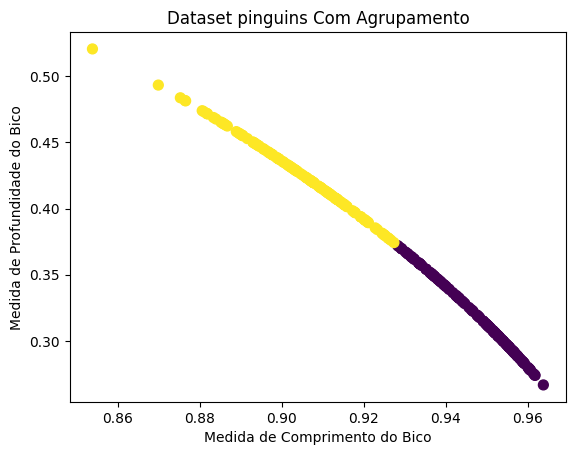

In [138]:
import matplotlib.pyplot as plt
plt.scatter(Xnorm[:,0], Xnorm[:,1], c=rotulos, s=50)
plt.title('Dataset pinguins Com Agrupamento')
plt.xlabel('Medida de Comprimento do Bico')
plt.ylabel('Medida de Profundidade do Bico')
plt.show()

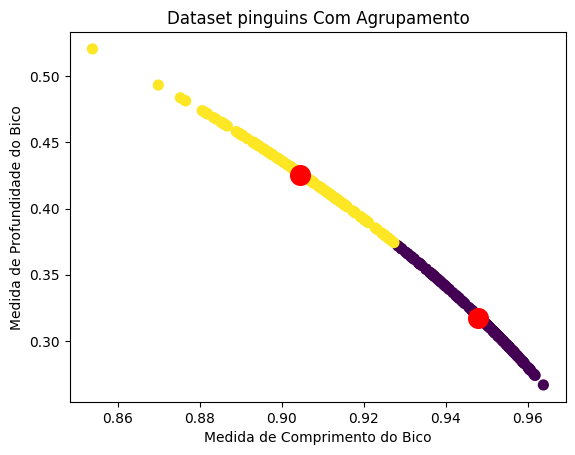

In [139]:
import matplotlib.pyplot as plt
plt.scatter(Xnorm[:,0], Xnorm[:,1], c=rotulos, s=50, cmap='viridis')
plt.scatter(modelo.cluster_centers_[:,0], modelo.cluster_centers_[:,1], s=200, c='red', label='centroids')
plt.title('Dataset pinguins Com Agrupamento')
plt.xlabel('Medida de Comprimento do Bico')
plt.ylabel('Medida de Profundidade do Bico')
plt.show()